<a href="https://colab.research.google.com/github/Nurochman79/DataScience/blob/main/Prediction_of_landing_objective_by_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This  case study has an objective to develop mechine learning for prediction of landing purpose by K-Nearest Neighbors (KNN). We use german_credit_dataset. KNN is one of olgorithm -supervise learning model. This algoritme will clasify the new data based on sameless with K (number) around it (nearest). In this case we find the best K is 14 for 15 sample . In other hand we try to apply Factor Analyzer (analysis relation between feature) and PCA to reduce feature for modeling.

In [ ]:
#import library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Load data set and show data
df = pd.read_csv('/content/german_credit_data.csv')
df.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


**1.DATA PREPOCSSING**

In [ ]:
#We drop column "Unnamed:0"
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
#We can find the demension of dataset
df.shape
#We get a number of rows (1000) and a number of columns(10)

(1000, 9)

In [ ]:
#We can find the number of missing value (NA/null) for each columns. 
#In this dataset, we find missing value 183 in "Saving accounts " and 394 in "Checking account"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [ ]:
#We check the number of each data in "Saving accounts" column
df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [ ]:
#We chaeck the number of each data ini "Checking account" column
df['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

We replace all missing values in "Saving accounts" and "Checking account" by mode value " little"

In [ ]:
df['Saving accounts'].fillna('little', axis=0, inplace=True)

In [ ]:
df['Checking account'].fillna('little', axis=0, inplace=True)

In [ ]:
df['Saving accounts'].value_counts()

little        786
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [ ]:
df['Checking account'].value_counts()

little      668
moderate    269
rich         63
Name: Checking account, dtype: int64

Now there is not missing value in dataset as we can see below. Each column has 1000 Non-Null.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [ ]:
df.duplicated().sum() # No duplicated data in dataset

0

We rename the columns of "Credit amount" to make sure no problem during outlier handling.

In [ ]:
df.rename(columns=({"Credit amount":"Credit_amount"}), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit_amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


We define which the feature columns and traget column

In [ ]:
df_features = df.drop('Purpose', axis=1)
df_target = df['Purpose']
y=df_target

**Outlier handling**

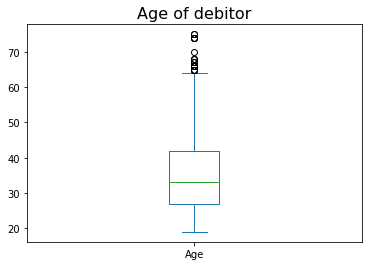

In [ ]:
df['Age'].plot(kind='box')
plt.title('Age of debitor', size=16)
plt.show()

In [ ]:
Q1 = df['Age'].quantile(0.25) # Finding Q1 value
Q3 = df['Age'].quantile(0.75) # Finding Q3 value
IQR = Q3-Q1 # Calculating IQR
print('Q1 = ', Q1)
print('Q3 = ', Q3)
print('IQR Age = ', IQR)


Q1 =  27.0
Q3 =  42.0
IQR Age =  15.0


In [ ]:
nilai_min = df['Age'].min() # Finding min.value
nilai_max = df['Age'].max() # Finding max.value
 
min_IQR = Q1 - 1.5 * IQR # Calculating min. IQR
max_IQR = Q3 + 1.5 * IQR # Calculating max. IQR
 
# Conditional to find low outlier
if (nilai_min < min_IQR): 
 print('Low outlier is found <', min_IQR)
 # Showing low outlier index 
 print('Low Outlier Index :', list(df[df['Age'] < min_IQR].index)) 
 
# Conditional to find high outlier
if (nilai_max > max_IQR):
 print('High outlier is found >', max_IQR)
 # Showing high outlier index 
 print('High outlier Index : ', list(df[df['Age'] > max_IQR].index)) 

High outlier is found > 64.5
High outlier Index :  [0, 75, 137, 163, 179, 186, 187, 213, 330, 430, 438, 536, 554, 606, 624, 723, 756, 774, 779, 807, 846, 883, 917]


In [ ]:
df=df.drop([0, 75, 137, 163, 179, 186, 187, 213, 330, 430, 438, 536, 554, 606, 624, 723, 756, 774, 779, 807, 846, 883, 917], axis=0)

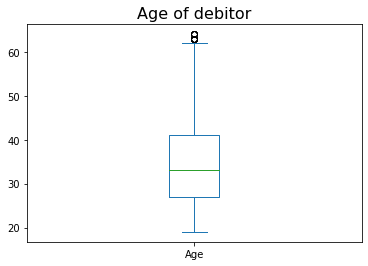

In [ ]:
df['Age'].plot(kind='box')
plt.title('Age of debitor', size=16)
plt.show()

In [ ]:
df=df.drop(df[df.Age > 60].index, axis=0)

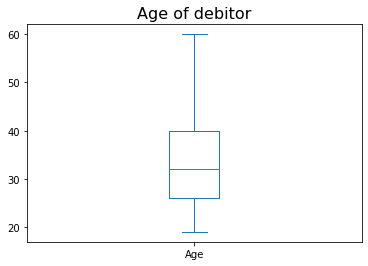

In [ ]:
df['Age'].plot(kind='box')
plt.title('Age of debitor', size=16)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955 entries, 1 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               955 non-null    int64 
 1   Sex               955 non-null    object
 2   Job               955 non-null    int64 
 3   Housing           955 non-null    object
 4   Saving accounts   955 non-null    object
 5   Checking account  955 non-null    object
 6   Credit_amount     955 non-null    int64 
 7   Duration          955 non-null    int64 
 8   Purpose           955 non-null    object
dtypes: int64(4), object(5)
memory usage: 74.6+ KB


In [ ]:
df.shape

(955, 9)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             955 non-null    int64 
 1   Age               955 non-null    int64 
 2   Sex               955 non-null    object
 3   Job               955 non-null    int64 
 4   Housing           955 non-null    object
 5   Saving accounts   955 non-null    object
 6   Checking account  955 non-null    object
 7   Credit_amount     955 non-null    int64 
 8   Duration          955 non-null    int64 
 9   Purpose           955 non-null    object
dtypes: int64(5), object(5)
memory usage: 74.7+ KB


In [ ]:
df=df.drop(columns=['index'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               955 non-null    int64 
 1   Sex               955 non-null    object
 2   Job               955 non-null    int64 
 3   Housing           955 non-null    object
 4   Saving accounts   955 non-null    object
 5   Checking account  955 non-null    object
 6   Credit_amount     955 non-null    int64 
 7   Duration          955 non-null    int64 
 8   Purpose           955 non-null    object
dtypes: int64(4), object(5)
memory usage: 67.3+ KB


In [ ]:
df.shape

(955, 9)

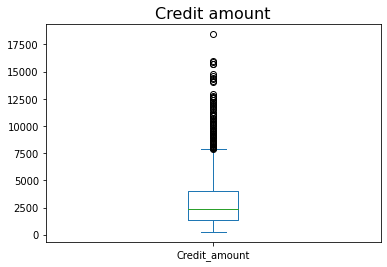

In [ ]:
df['Credit_amount'].plot(kind='box')
plt.title('Credit amount', size=16)
plt.show()

In [ ]:
Q1C = df['Credit_amount'].quantile(0.25) # Finding Q1 value
Q3C = df['Credit_amount'].quantile(0.75) # Finding Q3 value
IQRC = Q3C-Q1C # Calculating IQR
print('Q1C = ', Q1C)
print('Q3C = ', Q3C)
print('IQR Credit amount = ', IQRC)

Q1C =  1375.0
Q3C =  3977.5
IQR Credit amount =  2602.5


In [ ]:
nilai_min = df['Credit_amount'].min() # Finding min.value
nilai_max = df['Credit_amount'].max() # Finding max.value
 
min_IQRC = Q1C - 1.5 * IQRC # Calculating min. IQR
max_IQRC = Q3C + 1.5 * IQRC # Calculating max. IQR
 
# Conditional to find low outlier
if (nilai_min < min_IQRC): 
 print('Low outlier is found <', min_IQRC)
 # Showing low outlier index 
 print('Low Outlier Index :', list(df[df['Credit_amount'] < min_IQRC].index)) 
 
# Conditional to find high outlier
if (nilai_max > max_IQRC):
 print('High outlier is found >', max_IQRC)
 # Showing high outlier index 
 print('High outlier Index : ', list(df[df['Credit_amount'] > max_IQRC].index)) 

High outlier is found > 7881.25
High outlier Index :  [2, 4, 15, 16, 54, 59, 66, 73, 82, 90, 99, 123, 127, 129, 170, 193, 212, 222, 253, 257, 259, 269, 275, 279, 288, 316, 355, 359, 362, 376, 383, 398, 411, 428, 467, 472, 485, 501, 523, 536, 587, 588, 607, 615, 623, 627, 642, 653, 683, 703, 711, 729, 736, 768, 770, 774, 779, 789, 793, 813, 840, 845, 853, 860, 873, 878, 884, 902, 910, 936, 939]


In [ ]:
df=df.drop([2, 4, 15, 16, 54, 59, 66, 73, 82, 90, 99, 123, 127, 129, 170, 193, 212, 222, 253, 257, 259, 269, 275, 279, 288, 316, 355, 359, 362, 376, 383, 398, 411, 428, 467, 472, 485, 501, 523, 536, 587, 588, 607, 615, 623, 627, 642, 653, 683, 703, 711, 729, 736, 768, 770, 774, 779, 789, 793, 813, 840, 845, 853, 860, 873, 878, 884, 902, 910, 936, 939], axis=0)

In [ ]:
df.shape

(884, 9)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             884 non-null    int64 
 1   Age               884 non-null    int64 
 2   Sex               884 non-null    object
 3   Job               884 non-null    int64 
 4   Housing           884 non-null    object
 5   Saving accounts   884 non-null    object
 6   Checking account  884 non-null    object
 7   Credit_amount     884 non-null    int64 
 8   Duration          884 non-null    int64 
 9   Purpose           884 non-null    object
dtypes: int64(5), object(5)
memory usage: 69.2+ KB


In [ ]:
df.shape

(884, 10)

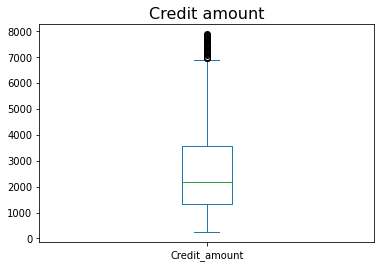

In [ ]:
df['Credit_amount'].plot(kind='box')
plt.title('Credit amount', size=16)
plt.show()

In [ ]:
df=df.drop(df[df.Credit_amount > 6300].index, axis=0)

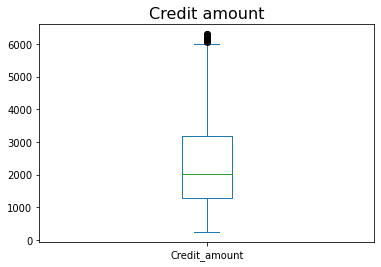

In [ ]:
df['Credit_amount'].plot(kind='box')
plt.title('Credit amount', size=16)
plt.show()

In [ ]:
df=df.drop(df[df.Credit_amount > 5700].index, axis=0)

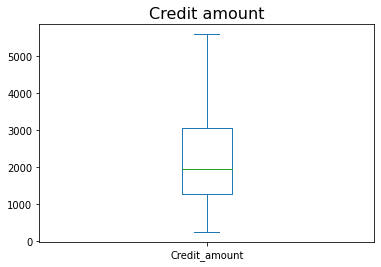

In [ ]:
df['Credit_amount'].plot(kind='box')
plt.title('Credit amount', size=16)
plt.show()

In [ ]:
df.shape

(797, 10)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   level_0           797 non-null    int64 
 1   index             797 non-null    int64 
 2   Age               797 non-null    int64 
 3   Sex               797 non-null    object
 4   Job               797 non-null    int64 
 5   Housing           797 non-null    object
 6   Saving accounts   797 non-null    object
 7   Checking account  797 non-null    object
 8   Credit_amount     797 non-null    int64 
 9   Duration          797 non-null    int64 
 10  Purpose           797 non-null    object
dtypes: int64(6), object(5)
memory usage: 68.6+ KB


In [ ]:
df=df.drop("index", axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   level_0           797 non-null    int64 
 1   Age               797 non-null    int64 
 2   Sex               797 non-null    object
 3   Job               797 non-null    int64 
 4   Housing           797 non-null    object
 5   Saving accounts   797 non-null    object
 6   Checking account  797 non-null    object
 7   Credit_amount     797 non-null    int64 
 8   Duration          797 non-null    int64 
 9   Purpose           797 non-null    object
dtypes: int64(5), object(5)
memory usage: 62.4+ KB


In [ ]:
df=df.drop("level_0", axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               797 non-null    int64 
 1   Sex               797 non-null    object
 2   Job               797 non-null    int64 
 3   Housing           797 non-null    object
 4   Saving accounts   797 non-null    object
 5   Checking account  797 non-null    object
 6   Credit_amount     797 non-null    int64 
 7   Duration          797 non-null    int64 
 8   Purpose           797 non-null    object
dtypes: int64(4), object(5)
memory usage: 56.2+ KB


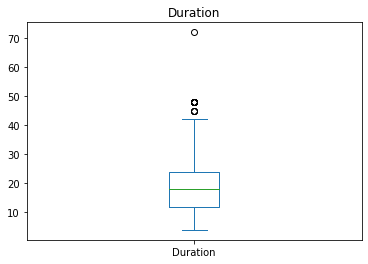

In [ ]:
df['Duration'].plot(kind="box")
plt.title('Duration')
plt.show()

In [ ]:
Q1D = df['Duration'].quantile(0.25) # Finding Q1 value
Q3D = df['Duration'].quantile(0.75) # Finding Q3.value
IQRD = Q3D-Q1D # Calculating IQR
print('Q1D = ', Q1D)
print('Q3D = ', Q3D)
print('IQR Duration = ', IQRD)

Q1D =  12.0
Q3D =  24.0
IQR Duration =  12.0


In [ ]:
nilai_min = df['Duration'].min() # Finding min.value
nilai_max = df['Duration'].max() # Finding max.value
 
min_IQRD = Q1D - 1.5 * IQRD # Calculating min. IQR
max_IQRD = Q3D + 1.5 * IQRD #Calculating max. IQR
 
#  Conditional to find low outlier
if (nilai_min < min_IQRD): 
 print('Low outlier is found <', min_IQRD)
 # Showing low outlier index 
 print('Low Outlier Index :', list(df[df['Credit_amount'] < min_IQRD].index)) 
 
# Conditional to find high outlier
if (nilai_max > max_IQRD):
 print('High outlier is found >', max_IQRD)
 # Showing low high outlier index
 print('High outlier Index : ', list(df[df['Credit_amount'] > max_IQRD].index))

High outlier is found > 42.0
High outlier Index :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211

In [ ]:
df=df.drop(df[df.Duration > 42].index, axis=0)

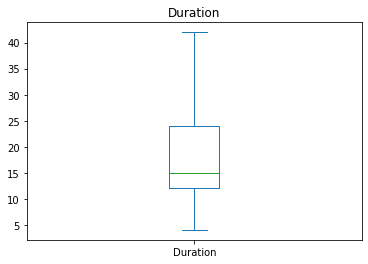

In [ ]:
df['Duration'].plot(kind="box")
plt.title('Duration')
plt.show()

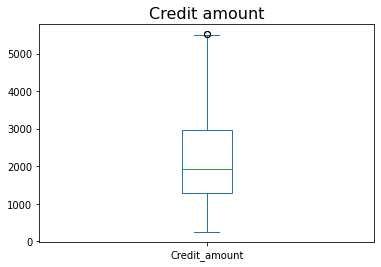

In [ ]:
df['Credit_amount'].plot(kind='box')
plt.title('Credit amount', size=16)
plt.show()

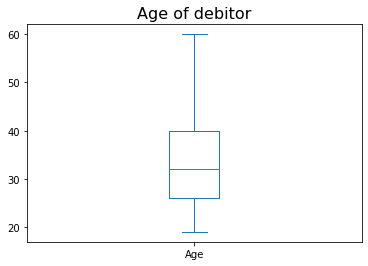

In [ ]:
df['Age'].plot(kind='box')
plt.title('Age of debitor', size=16)
plt.show()

In [ ]:
df.shape

(776, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 794
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               776 non-null    int64 
 1   Sex               776 non-null    object
 2   Job               776 non-null    int64 
 3   Housing           776 non-null    object
 4   Saving accounts   776 non-null    object
 5   Checking account  776 non-null    object
 6   Credit_amount     776 non-null    int64 
 7   Duration          776 non-null    int64 
 8   Purpose           776 non-null    object
dtypes: int64(4), object(5)
memory usage: 60.6+ KB


We clasify numericals columns and category columns to find descriptive information (mean,min, max,etc)

In [ ]:
nums=['Age','Job','Credit_amount','Duration']

In [ ]:
cats=['Sex','Housing','Saving accounts','Checking account','Purpose']

In [ ]:
df[nums].describe()  #We find that "Credit account" has big gap between "mean" and 50%(Q2)

,Age,Job,Credit_amount,Duration
count,776.000000,776.000000,776.000000,776.000000
mean,33.878866,1.841495,2186.412371,17.439433
std,9.455950,0.611190,1186.552503,8.268335
min,19.000000,0.000000,250.000000,4.000000
25%,26.000000,2.000000,1275.000000,12.000000
50%,32.000000,2.000000,1935.000000,15.000000
75%,40.000000,2.000000,2965.250000,24.000000
max,60.000000,3.000000,5511.000000,42.000000


In [ ]:
df[cats].describe()  #We find that "Purpose" columns has many unique values(8) with the most is "car" = 337

,Sex,Housing,Saving accounts,Checking account,Purpose
count,776,776,776,776,776
unique,2,3,4,3,8
top,male,own,little,little,car
freq,518,574,602,533,239


We can get the information about unique value in each column

In [ ]:
df['Housing'].unique()

array(['own', 'free', 'rent'], dtype=object)

In [ ]:
df['Saving accounts'].unique()

array(['little', 'quite rich', 'moderate', 'rich'], dtype=object)

In [ ]:
df['Checking account'].unique()

array(['little', 'moderate', 'rich'], dtype=object)

We will changes the "object" datatype to be "category" type for 'Sex','Housing','Saving accounts','Checking account' columns



In [ ]:
df_features[['Sex','Housing','Saving accounts','Checking account']] = df_features[['Sex',
'Housing', 'Saving accounts', 'Checking account']].astype('category')

In [ ]:
#We check data type for each column
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1000 non-null   int64   
 1   Sex               1000 non-null   category
 2   Job               1000 non-null   int64   
 3   Housing           1000 non-null   category
 4   Saving accounts   1000 non-null   category
 5   Checking account  1000 non-null   category
 6   Credit_amount     1000 non-null   int64   
 7   Duration          1000 non-null   int64   
dtypes: category(4), int64(4)
memory usage: 35.9 KB


**2. EXPLARATORY DATA ANALYSIS**



We apply the lable encoding for "Sex" column because has 2 velue (male/female).

In [ ]:
df_features['Sex'] = df_features['Sex'].cat.codes

We define the grading/level for each value in column "Housing", "Saving accounts" and "Checking account". We apply the ordinal lableling for them.

In [ ]:
dic = {'Housing': {'own': 1, 'free': 3, 'rent':2},
       'Saving accounts': {'little': 4, 'moderate': 3, 'quite rich': 2, 'rich': 1},
       'Checking account': {'little':3,'moderate': 2,'rich': 1}}

In [ ]:
df_features=df_features.replace(dic)
df_features.sample(20)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration
41,26,1,2,1,2,2,1158,12
338,28,1,2,1,4,3,4169,24
171,26,0,2,1,4,3,763,12
539,45,0,1,1,4,1,3049,18
425,21,1,2,2,4,2,2779,18
600,45,0,2,1,4,2,2329,7
527,42,1,1,1,4,3,1503,4
81,47,1,2,1,2,3,1213,15
142,27,1,3,1,4,3,3416,27
548,24,0,1,1,4,3,626,12


**3.SCALING**

We do scaling dataset by StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(df_features).transform(df_features.astype(float))
X[0:10]

array([[ 2.76645648,  0.67028006,  0.14694918, -0.58560305,  0.4634091 ,
         0.65383104, -0.74513141, -1.23647786],
       [-1.19140394, -1.49191369,  0.14694918, -0.58560305,  0.4634091 ,
        -1.00143742,  0.94981679,  2.24819436],
       [ 1.18331231,  0.67028006, -1.38377145, -0.58560305,  0.4634091 ,
         0.65383104, -0.41656241, -0.73866754],
       [ 0.8315025 ,  0.67028006,  0.14694918,  2.37947568,  0.4634091 ,
         0.65383104,  1.63424694,  1.75038404],
       [ 1.53512213,  0.67028006,  0.14694918,  2.37947568,  0.4634091 ,
         0.65383104,  0.5666635 ,  0.25695309],
       [-0.04802204,  0.67028006, -1.38377145,  2.37947568,  0.4634091 ,
         0.65383104,  2.05000901,  1.25257373],
       [ 1.53512213,  0.67028006,  0.14694918, -0.58560305, -2.02135821,
         0.65383104, -0.15462876,  0.25695309],
       [-0.04802204,  0.67028006,  1.67766981,  0.89693631,  0.4634091 ,
        -1.00143742,  1.30319683,  1.25257373],
       [ 2.23874176,  0.67028006

Array data are transformed to be dataframe.

In [ ]:
features=['Age','Sex','Job','Housing','Saving accounts','Checking account','Credit_amount','Duration']
new_df_features = pd.DataFrame(data=X, columns=features)
new_df_features.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration
0,2.766456,0.670280,0.146949,-0.585603,0.463409,0.653831,-0.745131,-1.236478
1,-1.191404,-1.491914,0.146949,-0.585603,0.463409,-1.001437,0.949817,2.248194
2,1.183312,0.670280,-1.383771,-0.585603,0.463409,0.653831,-0.416562,-0.738668
3,0.831502,0.670280,0.146949,2.379476,0.463409,0.653831,1.634247,1.750384
4,1.535122,0.670280,0.146949,2.379476,0.463409,0.653831,0.566664,0.256953
5,-0.048022,0.670280,-1.383771,2.379476,0.463409,0.653831,2.050009,1.252574
6,1.535122,0.670280,0.146949,-0.585603,-2.021358,0.653831,-0.154629,0.256953
7,-0.048022,0.670280,1.677670,0.896936,0.463409,-1.001437,1.303197,1.252574
8,2.238742,0.670280,-1.383771,-0.585603,-3.263742,0.653831,-0.075233,-0.738668
9,-0.663689,0.670280,1.677670,-0.585603,0.463409,-1.001437,0.695681,0.754763


**4.FACTOR ANALYZER**

We apply "Factor Analysis" to do analysis data " getting corelation each data.We have to get norelation number > 0.5 to make decision that there is coralation betwen each feature.

In [ ]:
df_corr=df_features.corr() #We have to find value > 0.5 based on table below
df_corr

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration
Age,1.000000,0.161694,0.015673,0.112051,-0.015772,0.027176,0.032716,-0.036136
Sex,0.161694,1.000000,0.070298,-0.033818,0.014425,0.012705,0.093482,0.081432
Job,0.015673,0.070298,1.000000,0.101939,0.034596,0.043277,0.285385,0.210910
Housing,0.112051,-0.033818,0.101939,1.000000,0.033771,0.004969,0.171585,0.137434
Saving accounts,-0.015772,0.014425,0.034596,0.033771,1.000000,0.015763,0.077929,0.043274
Checking account,0.027176,0.012705,0.043277,0.004969,0.015763,1.000000,-0.006953,-0.004163
Credit_amount,0.032716,0.093482,0.285385,0.171585,0.077929,-0.006953,1.000000,0.624984
Duration,-0.036136,0.081432,0.210910,0.137434,0.043274,-0.004163,0.624984,1.000000


In [ ]:
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 363 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=14899f1ebe989ad237b23e075e11eec651a827e672f2b351a01717d238716ba3
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

We can use p value (lower than 0.05 ---> cofident level 95%) to make conclution that there is coralation between each feature. 

In [ ]:
_,p=calculate_bartlett_sphericity(df_features) # p vaue is 2.71 -128 < 0.05
print('p value:',p)

p value: 2.7102932709354966e-128


In [ ]:
F_A=FactorAnalyzer()
F_A.fit(df_features)

FactorAnalyzer(rotation_kwargs={})

We can choise the eigen values that is bigger than 1 (best practise)

In [ ]:
ev,v=F_A.get_eigenvalues()
ev

array([1.88515115, 1.15924806, 1.01677571, 1.01051569, 0.98050739,
       0.83550502, 0.74729704, 0.36499994])

In [ ]:
#Based eigenvalue list above, we have 4 factor (>1)
F_A=FactorAnalyzer(n_factors=4)
F_A.fit(df_features)
df_F_A=pd.DataFrame(F_A.loadings_,index=df_features.columns)
df_F_A.columns=['Fac1','Fac2','Fac3','Fac4']
df_F_A

,Fac1,Fac2,Fac3,Fac4
Age,-0.122938,1.038532,0.183702,-0.070226
Sex,0.075951,0.151324,-0.054462,0.086887
Job,0.244527,-0.021998,0.021020,0.266368
Housing,0.052633,0.135385,1.001764,0.014667
Saving accounts,0.068672,-0.019950,0.013902,0.038140
Checking account,-0.051923,0.002871,0.000233,0.161084
Credit_amount,1.026438,0.072702,-0.016790,-0.276232
Duration,0.740903,-0.010424,-0.006474,-0.163216


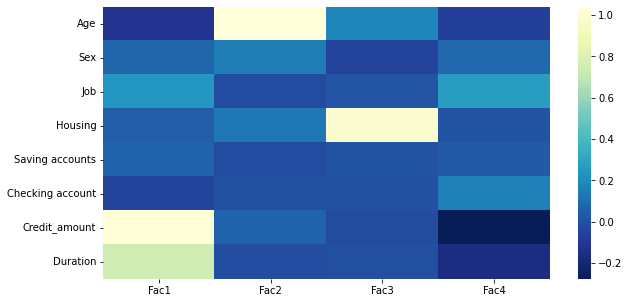

In [ ]:
fig, ax=plt.subplots(figsize=(10,5))
sns.heatmap(df_F_A,cmap='YlGnBu_r')

In [ ]:
#KMO test > 0.5 , it mean there is corelation each feature in dataset
kmo_all,kmo_model=calculate_kmo(df_features)
print('KMO test:',kmo_model)

KMO test: 0.5764334984822932


**5.PCA**. We try to apply PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca8=PCA(n_components=8)
pca8.fit(X)
pcs8=pca8.transform(X)
pcs8

array([[-0.94044801,  2.77407262, -0.5122498 , ..., -0.41209351,
         1.36683323,  0.08894612],
       [ 1.54360263, -2.56678617,  0.61817468, ...,  0.49650681,
         0.8805082 , -0.80127386],
       [-1.14469317,  1.44771209, -0.15995327, ...,  1.09360508,
         0.40282155,  0.25120655],
       ...,
       [-0.89589905,  0.79688978, -0.2182734 , ..., -0.39986506,
        -0.12131109, -0.15254588],
       [ 1.64685654, -0.35463158, -1.151708  , ...,  0.57215653,
        -2.18172667, -1.69854321],
       [ 1.3202856 , -0.77902012,  1.90591517, ...,  0.40740374,
        -0.2590064 , -0.94802951]])

In [ ]:
Xdfpca8=pd.DataFrame(data=pcs8,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8'])
Xdfpca8['Purpose']=df_target
Xdfpca8.head(10)


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,Purpose
0,-0.940448,2.774073,-0.512250,-0.375160,-0.405452,-0.412094,1.366833,0.088946,radio/TV
1,1.543603,-2.566786,0.618175,0.141798,-0.383052,0.496507,0.880508,-0.801274,radio/TV
2,-1.144693,1.447712,-0.159953,-0.582284,-0.525814,1.093605,0.402822,0.251207,education
3,2.960270,0.905101,-1.148068,0.823224,-0.136113,1.033229,-0.721546,-0.127055,furniture/equipment
4,1.460112,1.816204,-1.552759,1.050751,-0.300334,0.331051,-0.607740,0.062822,car
5,2.268877,0.276065,-1.005827,0.823682,-0.368138,2.249665,-1.345509,0.721778,education
6,-0.047418,1.705611,0.875551,0.150985,1.854990,0.226942,0.695920,-0.310129,furniture/equipment
7,2.576533,-0.092568,0.461410,0.417141,-0.598750,-1.009393,-0.364943,-0.104803,car
8,-1.274981,2.475144,1.255627,1.019315,2.499472,1.315545,0.828492,0.563790,radio/TV
9,1.471838,-0.581468,1.136138,-0.620884,-0.542248,-1.348976,-0.077943,-0.134037,car


In [ ]:
print('Explained variance:', pca8.explained_variance_)
print('Explained variance ration:', pca8.explained_variance_ratio_)

Explained variance: [1.88703819 1.16040847 1.0177935  1.01152721 0.98148888 0.83634136
 0.74804508 0.3653653 ]
Explained variance ration: [0.23564389 0.14490601 0.12709696 0.12631446 0.12256342 0.10443813
 0.09341213 0.04562499]


In [ ]:
pca5=PCA(n_components=5)
pca5.fit(X)
pcs5=pca5.transform(X)
dfpca5=pd.DataFrame(data=pcs5,columns=['pc1','pc2','pc3','pc4','pc5'])
dfpca5['Purpose']=df_target
dfpca5.head(10)

,pc1,pc2,pc3,pc4,pc5,Purpose
0,-0.940448,2.774073,-0.512250,-0.375160,-0.405452,radio/TV
1,1.543603,-2.566786,0.618175,0.141798,-0.383052,radio/TV
2,-1.144693,1.447712,-0.159953,-0.582284,-0.525814,education
3,2.960270,0.905101,-1.148068,0.823224,-0.136113,furniture/equipment
4,1.460112,1.816204,-1.552759,1.050751,-0.300334,car
5,2.268877,0.276065,-1.005827,0.823682,-0.368138,education
6,-0.047418,1.705611,0.875551,0.150985,1.854990,furniture/equipment
7,2.576533,-0.092568,0.461410,0.417141,-0.598750,car
8,-1.274981,2.475144,1.255627,1.019315,2.499472,radio/TV
9,1.471838,-0.581468,1.136138,-0.620884,-0.542248,car


In [ ]:
print('Explained variance:', pca5.explained_variance_)
print('Explained variance ration:', pca5.explained_variance_ratio_)

Explained variance: [1.88703819 1.16040847 1.0177935  1.01152721 0.98148888]
Explained variance ration: [0.23564389 0.14490601 0.12709696 0.12631446 0.12256342]


**6. TRAINING TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#For ordinal encoding
X_train_ord, X_test_ord, y_train_ord, y_test_ord = train_test_split(X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train_ord.shape, y_train_ord.shape)
print ('Test set:', X_test_ord.shape, y_test_ord.shape)

Train set: (800, 8) (800,)
Test set: (200, 8) (200,)


In [ ]:
X_pca8=Xdfpca8.drop('Purpose', axis=1)  #For PCA 8
Y_pca8=Xdfpca8['Purpose']
X_train_pca8, X_test_pca8, y_train_pca8, y_test_pca8 = train_test_split(X_pca8, Y_pca8, test_size=0.2, random_state=0)
print ('Train set:', X_train_pca8.shape, y_train_pca8.shape)
print ('Test set:', X_test_pca8.shape, y_test_pca8.shape)

Train set: (800, 8) (800,)
Test set: (200, 8) (200,)


In [ ]:
X_pca5=dfpca5.drop('Purpose', axis=1)   #For PCA 5
Y_pca5=dfpca5['Purpose']
X_train_pca5,X_test_pca5,Y_train_pca5,Y_test_pca5=train_test_split(
                                                                    X_pca5,Y_pca5, test_size=0.2,
                                                                   random_state=0)

In [ ]:
print ('Train set:', X_train_pca5.shape, Y_train_pca5.shape)
print ('Test set:', X_test_pca5.shape, Y_test_pca5.shape)

Train set: (800, 5) (800,)
Test set: (200, 5) (200,)


**7.MODELING KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = 5   #For ordial
model_knn_ord = KNeighborsClassifier(n_neighbors = k).fit(X_train_ord, y_train_ord)
model_knn_ord

KNeighborsClassifier()

In [ ]:
k = 5   #For PCA8
model_knn_pca8 = KNeighborsClassifier(n_neighbors = k).fit(X_train_pca8, y_train_pca8)
model_knn_pca8

KNeighborsClassifier()

In [ ]:
k = 5   #For PCA5
model_knn_pca5 = KNeighborsClassifier(n_neighbors = k).fit(X_train_pca5, Y_train_pca5)
model_knn_pca5

KNeighborsClassifier()

**8.TESTING**

In [ ]:
y_pred_ord = model_knn_ord.predict(X_test_ord)
y_pred_ord[0:5]

array(['car', 'car', 'furniture/equipment', 'business', 'car'],
      dtype=object)

In [ ]:
y_pred_pca8 = model_knn_pca8.predict(X_test_pca8)
y_pred_pca8[0:5]


array(['car', 'car', 'furniture/equipment', 'business', 'car'],
      dtype=object)

In [ ]:
Y_pred_pca5 = model_knn_pca5.predict(X_test_pca5) #For PCA 5
Y_pred_pca5[0:5]

array(['business', 'car', 'furniture/equipment', 'radio/TV', 'business'],
      dtype=object)

**9.EVALUTION**

In [ ]:
from sklearn.metrics import accuracy_score
print('Akurasi Train set: ', accuracy_score(y_train_ord, model_knn_ord.predict(X_train_ord)))
print('Akurasi Test set: ', accuracy_score(y_test_ord, y_pred_ord))

Akurasi Train set:  0.51125
Akurasi Test set:  0.355


In [ ]:
from sklearn.metrics import accuracy_score
print('Akurasi Train set: ', accuracy_score(y_train_pca8, model_knn_pca8.predict(X_train_pca8)))
print('Akurasi Test set: ', accuracy_score(y_test_pca8, y_pred_pca8))

Akurasi Train set:  0.51125
Akurasi Test set:  0.355


In [ ]:
from sklearn.metrics import accuracy_score
print('Akurasi Train set: ', accuracy_score(Y_train_pca5, model_knn_pca5.predict(X_train_pca5)))
print('Akurasi Test set: ', accuracy_score(Y_test_pca5, Y_pred_pca5))

Akurasi Train set:  0.515
Akurasi Test set:  0.37


In [ ]:
Ks = 15
mean_acc_pca8 = np.zeros((Ks-1))
for n in range(1, Ks):
 model_knn_pca8 = KNeighborsClassifier(n_neighbors = n).fit(X_train_pca8, y_train_pca8)
 y_pred_pca8 = model_knn_pca8.predict(X_test_pca8)
 mean_acc_pca8[n-1] = accuracy_score(y_test_pca8, y_pred_pca8)
mean_acc_pca8

array([0.36 , 0.32 , 0.335, 0.345, 0.355, 0.375, 0.375, 0.4  , 0.415,
       0.415, 0.415, 0.425, 0.42 , 0.43 ])

In [ ]:
Ks = 15
mean_acc_pca5 = np.zeros((Ks-1))
for n in range(1, Ks):
 model_knn_pca5 = KNeighborsClassifier(n_neighbors = n).fit(X_train_pca5, Y_train_pca5)
 y_pred_pca5 = model_knn_pca5.predict(X_test_pca5)
 mean_acc_pca5[n-1] = accuracy_score(Y_test_pca5, Y_pred_pca5)
mean_acc_pca5

array([0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37,
       0.37, 0.37, 0.37])

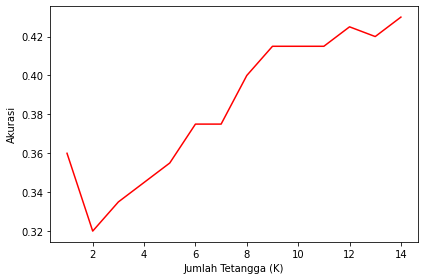

In [ ]:
plt.plot(range(1,Ks), mean_acc_pca8, 'r')
plt.ylabel('Akurasi')
plt.xlabel('Jumlah Tetangga (K)')
plt.tight_layout()
plt.show()

In [ ]:
print('Akurasi terbaik adalah ', mean_acc_pca8.max(), 'dengan nilai k =', mean_acc_pca8.argmax()+1)


Akurasi terbaik adalah  0.43 dengan nilai k = 14


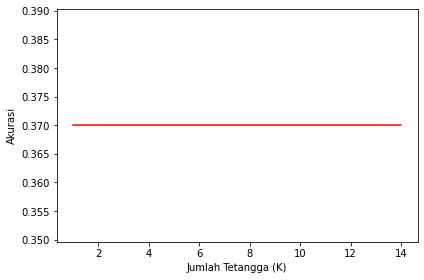

In [ ]:
plt.plot(range(1,Ks), mean_acc_pca5, 'r')
plt.ylabel('Akurasi')
plt.xlabel('Jumlah Tetangga (K)')
plt.tight_layout()
plt.show()